# Numerical Solution of the One-Dimensional Time-Independent Schrodinger Equation

## The Numerov Method

We divide this portion of the $x$ axis into small intervals, each length $s$. The points $x_0$ and $x_max$ are the endpoints of this portion, and $x_n$ is the end point of the $n$-th interval. Let $\psi_{n - 1}$, $\psi_{n}$, and $\psi_{n + 1}$ denote the values of $\psi$ at the points $x_n - s$, $x_n$, and $x_n + s$, respectively

$$
\psi_{n - 1} = \psi(x_n - s), \quad \psi_n = \psi(x_n), \quad \psi_{n + 1} = \psi_{x_n + s}
$$

The $n$ subscript means $\psi$ is evaluated at the point $x_n$. We write the Schrodinger equation

$$
- \frac{\hbar^2}{2m} \psi^{\prime \prime} + V \psi = E \psi
$$

as

$$
\psi^{\prime \prime} = G \psi
$$

where 

$$
G = m \hbar^{-2} [2V(x) - 2E]
$$

By expanding $\psi{x_n + s}$ and $\psi{x_n - s}$ in Taylor series involving powers of $s$

$$
\psi_{n + 1} \approx \frac{2 \psi_n - \psi_{n - 1} + \frac{5}{6} G_n \psi_n s^2 + \frac{1}{12} G_{n - 1} \psi_{n - 1}s^2}{1 - \frac{1}{12} G_{n + 1} s^2}
$$


In [65]:
function harmonic(ν=0)
    len = 160
    x = range(-4.0, 4.0; length=len)
    s = step(x)
    
    ψ = zeros(len)
    ψ[end - 1] = 1e-4
    
    G = zeros(len)
    
    E = ν + 0.5

    V(x) = 1/2 * x^2
    
    G = @. 2 * V(x) - 2 * E
    
    for i in reverse(2 : len - 1)
        ψ[i - 1] = (2 * ψ[i] - ψ[i + 1] + 5/6 * G[i] * ψ[i] * s^2 + 1/12 * G[i + 1] * ψ[i + 1] * s^2)/(1 - 1/12 * G[i - 1] * s^2)
    end
    
    return x, ψ
end


harmonic (generic function with 2 methods)

In [66]:
using Plots

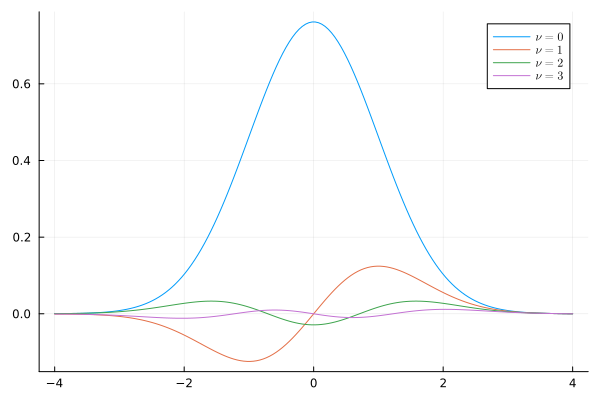

In [68]:
p = plot()

for i = 0 : 3
    x, ψ = harmonic(i)
    p = plot!(x, ψ, label="\$\\nu = $i\$")
end

display(p)